In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

In [6]:
c = load_breast_cancer()

rng = np.random.RandomState(47)
noise = rng.normal(size=(len(c.data), 50))
X_w_noise = np.hstack([c.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, c.target, random_state=0, test_size=.5)

In [2]:
selectModel = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=47), threshold='median')

In [7]:
selectModel.fit(X_train, y_train)
X_train_l1 = selectModel.transform(X_train)

print('Форма обучающего набора X: {}'.format(X_train.shape))
print('Форма обучающего набора X с l1: {}'.format(X_train_l1.shape))

Форма обучающего набора X: (284, 80)
Форма обучающего набора X с l1: (284, 40)


Text(0.5, 0, 'Индекс примера')

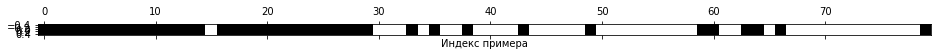

In [9]:
mask = selectModel.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel('Индекс примера')

In [10]:
from sklearn.linear_model import LogisticRegression

In [18]:
X_test_l1 = selectModel.transform(X_test)
score = LogisticRegression(max_iter=10000).fit(X_train_l1, y_train).score(X_test_l1, y_test)
print('Правильность на тестовом наборе: {:.3f}'.format(score))

Правильность на тестовом наборе: 0.965
